In [12]:
# import datetime, time
import simpy
import shapely.geometry
import pandas as pd
import inspect
import sys 
import os 
import matplotlib.pyplot as plt

In [13]:
import openclsim.core as core
import openclsim.model as model
import openclsim.plot as plot
import openclsim.plugins as plugins

import openclsim.WID as WID

ModuleNotFoundError: No module named 'produce_amount_activity'

In [ ]:
simulation_start = 0
my_env = simpy.Environment(initial_time=simulation_start)

In [ ]:
Site = type(
    "Site",
    (
        core.Identifiable,
        core.Log,
        core.Locatable,
        core.HasContainer,
        core.HasResource,
    ),
    {},
)
TransportProcessingResource = type(
    "TransportProcessingResource",
    (
        core.ContainerDependentMovable, 
        core.HasResource,
        core.WIDProcessor,
        core.Identifiable,
        core.Log,
    ),
    {},
)

In [ ]:
location_dredging_site = shapely.geometry.Point(1, 1)

data_dredging_site = {
    "env": my_env,
    "name": "dredging location",
    "geometry": location_dredging_site,    
    "capacity":90000,
    "level":90000,
}

Dredging_site = Site(**data_dredging_site)

data_vessel = {
    "env": my_env,
    "name": "WID vessel",
    "geometry": location_dredging_site,  
    "capacity":1740,
    "compute_v": lambda x: 1
}

WID_vessel = TransportProcessingResource(**data_vessel)

In [ ]:
registry = {}

In [ ]:
sub_processes = [
    model.ProduceAmountActivity(
        env=my_env,
        WIDprocessor=WID_vessel,
        destination = WID_vessel,
        origin=Dredging_site,
        name='WID activity',
        registry=registry,
        amount=2,
        duration=5,
    ),
    model.BasicActivity(
        env=my_env,
        name='Basic activity',
        registry=registry,
        duration=1
    )
]

while_activity = model.WhileActivity(
    env=my_env,
    name='While activity',
    registry=registry,
    sub_processes=sub_processes,
    condition_event=[
        {"type":"container", "concept":Dredging_site,"state":"empty"}
    ],
)

In [ ]:
model.register_processes([while_activity])
my_env.run(until=100)

In [ ]:
df_WID = pd.concat(
    [
        plot.get_log_dataframe(WID_vessel, [while_activity, *sub_processes])
        for act in sub_processes
    ]
).sort_values(by=['Timestamp'])
df_SITE = pd.concat(
    [
        plot.get_log_dataframe(Dredging_site, [while_activity, *sub_processes])
        for act in sub_processes
    ]
).sort_values(by=['Timestamp'])

In [ ]:
display(plot.get_log_dataframe(WID_vessel, [while_activity, *sub_processes]))

,Activity,Timestamp,ActivityState,container level,geometry
0,WID activity,1970-01-01 00:00:00,START,0.0,POINT (1 1)
1,WID activity,1970-01-01 00:00:05,STOP,0.0,POINT (1 1)
2,WID activity,1970-01-01 00:00:06,START,0.0,POINT (1 1)
3,WID activity,1970-01-01 00:00:11,STOP,0.0,POINT (1 1)
4,WID activity,1970-01-01 00:00:12,START,0.0,POINT (1 1)
5,WID activity,1970-01-01 00:00:17,STOP,0.0,POINT (1 1)
6,WID activity,1970-01-01 00:00:18,START,0.0,POINT (1 1)
7,WID activity,1970-01-01 00:00:23,STOP,0.0,POINT (1 1)
8,WID activity,1970-01-01 00:00:24,START,0.0,POINT (1 1)
9,WID activity,1970-01-01 00:00:29,STOP,0.0,POINT (1 1)


In [ ]:
display(plot.get_log_dataframe(Dredging_site, [while_activity]))

,Activity,Timestamp,ActivityState,container level,geometry
0,WID activity,1970-01-01 00:00:00,START,90000,POINT (1 1)
1,WID activity,1970-01-01 00:00:05,STOP,89998,POINT (1 1)
2,WID activity,1970-01-01 00:00:06,START,89998,POINT (1 1)
3,WID activity,1970-01-01 00:00:11,STOP,89996,POINT (1 1)
4,WID activity,1970-01-01 00:00:12,START,89996,POINT (1 1)
5,WID activity,1970-01-01 00:00:17,STOP,89994,POINT (1 1)
6,WID activity,1970-01-01 00:00:18,START,89994,POINT (1 1)
7,WID activity,1970-01-01 00:00:23,STOP,89992,POINT (1 1)
8,WID activity,1970-01-01 00:00:24,START,89992,POINT (1 1)
9,WID activity,1970-01-01 00:00:29,STOP,89990,POINT (1 1)


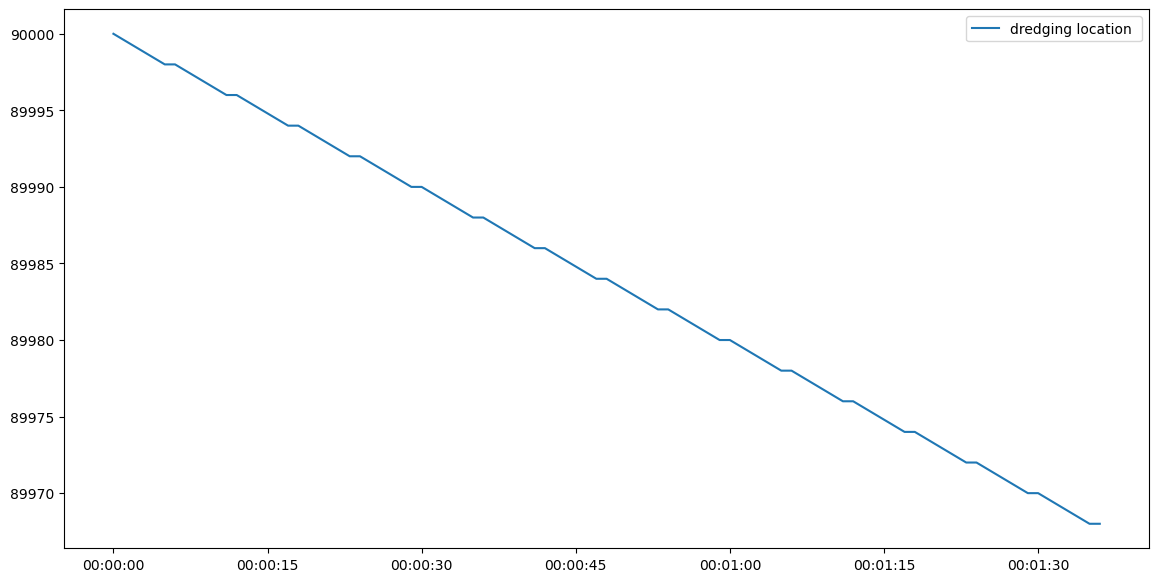

In [ ]:
fig = plot.get_step_chart([Dredging_site])